## Importing Necessary Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,auc,classification_report,r2_score

In [2]:
# data Set Loading

df=pd.read_csv(r"C:\Users\melbi\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Shape :",df.shape)
print('No. of columns:', df.shape[1])
print('No. of Rows:', df.shape[0])

Shape : (7043, 21)
No. of columns: 21
No. of Rows: 7043


In [4]:
df.info()  #dataset information ;number of datas are present, datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [5]:
#Looking for Null values are present or not
print('Number of null values are present:\n',df.isna().sum())

Number of null values are present:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


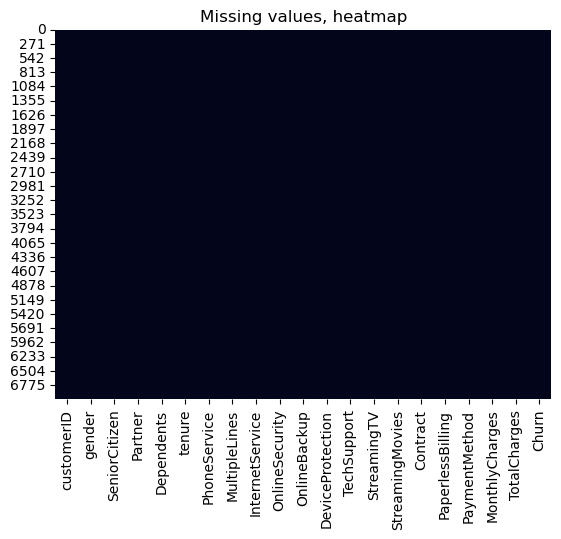

In [6]:
sns.heatmap(df.isnull(),cbar=False)
plt.title('Missing values, heatmap')
plt.show()

In [7]:
#Looking for any duplicates are present 

print('Number of duplicate values are presented:', df.duplicated().sum())

Number of duplicate values are presented: 0


##### 
So while looking for this dataset that we can see that there is no null values and duplicate values are presented, 
21 columns and 7043 rows are presented. Most of the columns are categorical values . Now we can looking for any outliers are presented or not

#### Changeing data type

In [8]:
df['TotalCharges'].unique()
df=df.drop(columns=['TotalCharges'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [9]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [10]:
categorical_features=df.select_dtypes(include=['object']).columns
categorical_features.tolist()

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

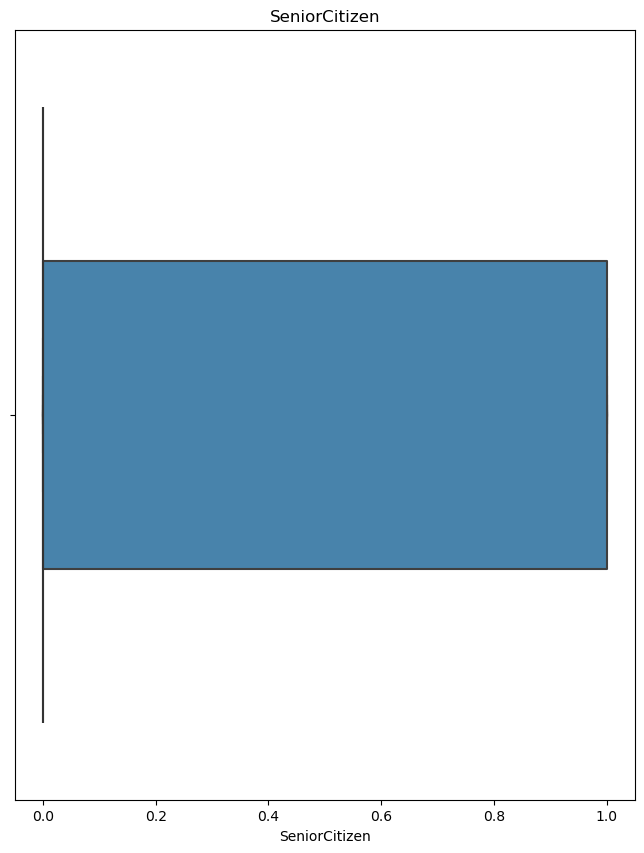

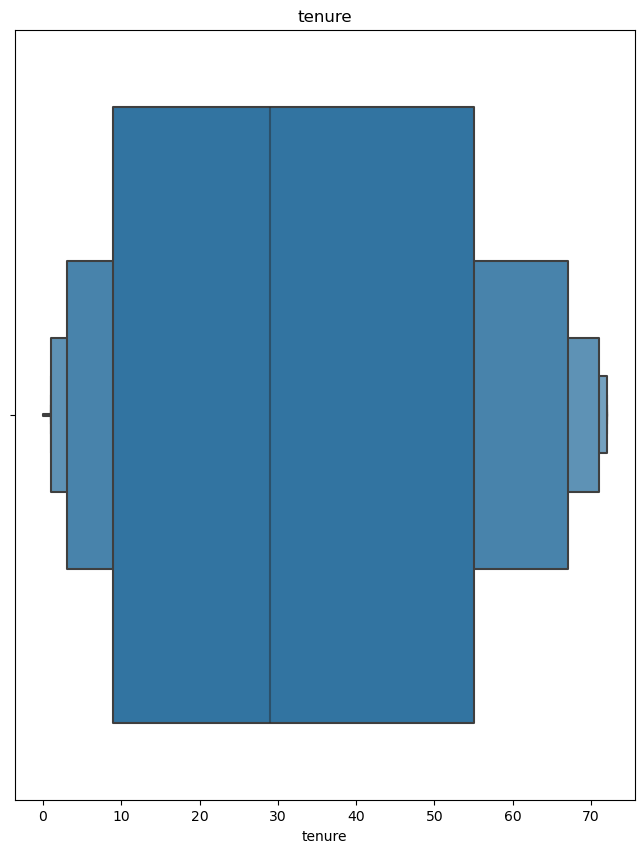

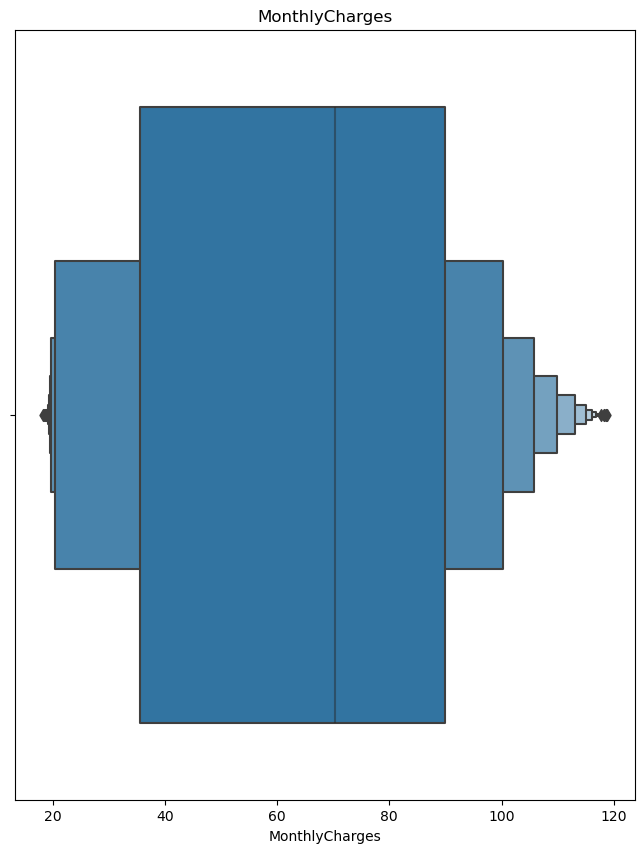

In [11]:
#Looking for outliers
# plt.figure(figsize=(15,20))
for i,columns in enumerate(numerical_features):
    plt.figure(figsize=(8,10))
#     plt.subplot(len(numerical_features)//3+1, 3, i+1)
    sns.boxenplot(x=df[columns])
    plt.title(columns)
plt.show()

## EDA

In [12]:
gender_churn_count=df.groupby(['gender',])['Churn'].count()
gender_churn_count

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

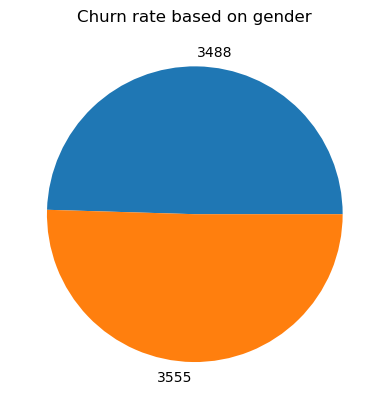

In [13]:
plt.title('Churn rate based on gender')
plt.pie(x=gender_churn_count,labels=gender_churn_count);

In [14]:
monthly_charge=df.groupby(['gender'])['MonthlyCharges']
charge_gender=monthly_charge.aggregate(np.average)
charge_gender

gender
Female    65.204243
Male      64.327482
Name: MonthlyCharges, dtype: float64

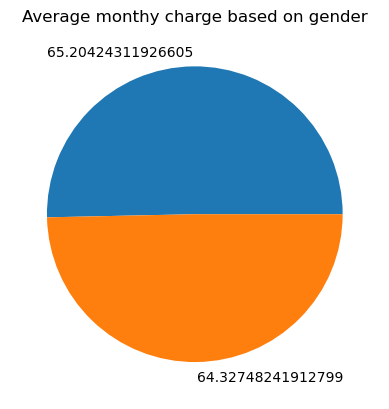

In [15]:
plt.title("Average monthy charge based on gender")
plt.pie(x=charge_gender, labels=charge_gender);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


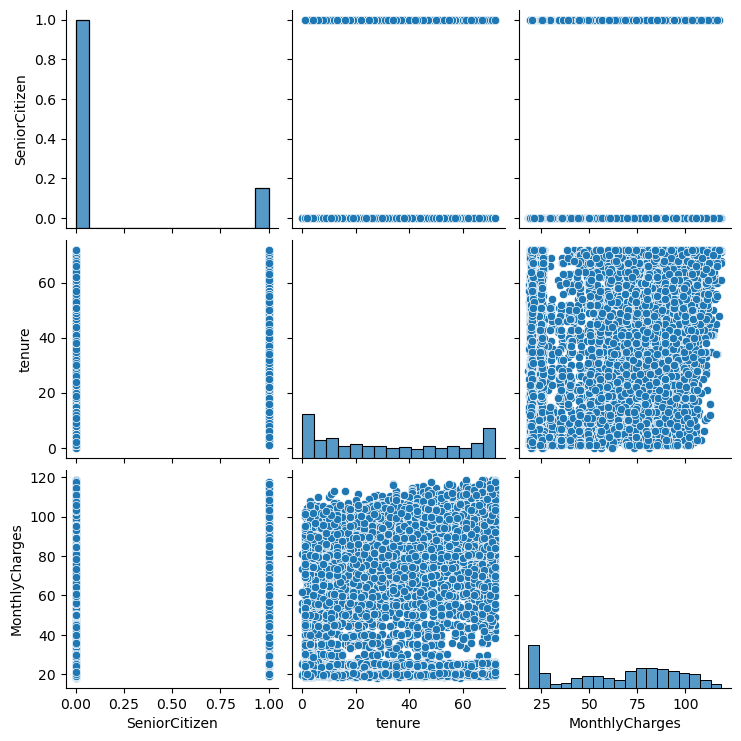

In [16]:

sns.pairplot(df);

######
based on above pie chart we can say that the chur rate compating between male and female and monthly charges are slightly different each other

### Categorical encoding

###### 
In this data set i am using Label encoding , beacuse if i use one hot encoding; in this dataset have 15+ columns have categorical values so one hot encoding may make a large number of columns

In [17]:
label=LabelEncoder()
for categories in categorical_features:
    df[categories]=label.fit_transform(df[categories])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


##### Scaling

######
In this dataset have only 2 numerical data's.

In [19]:
scaling_features=[['tenure','MonthlyCharges']]
scale=StandardScaler()
for i in scaling_features:
    df[i]=scale.fit_transform(df[i])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,5375,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,0
1,3962,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,0
2,2564,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,1
3,5535,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,0
4,6511,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,1


### Feature Selection

In [20]:
X= df.drop(columns=['Churn'])
y=df['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42)

print('shape of X_train:',X_train.shape)
print('shape of y_train:',y_train.shape)
print('shape of X_test:',X_test.shape)
print('shape of y_test:',y_test.shape)

shape of X_train: (4930, 19)
shape of y_train: (4930,)
shape of X_test: (2113, 19)
shape of y_test: (2113,)


###### For feature selection using RFE

In [25]:
model=LogisticRegression()
rfe=RFE(estimator=model, n_features_to_select=15)
rfe.fit(X_train,y_train)

ranking=rfe.ranking_

features=pd.DataFrame({
    'features':X.columns,
    'Ranking':ranking
})

print(features.sort_values(by='Ranking'))

            features  Ranking
9     OnlineSecurity        1
16  PaperlessBilling        1
15          Contract        1
12       TechSupport        1
11  DeviceProtection        1
10      OnlineBackup        1
17     PaymentMethod        1
8    InternetService        1
18    MonthlyCharges        1
6       PhoneService        1
5             tenure        1
4         Dependents        1
2      SeniorCitizen        1
1             gender        1
7      MultipleLines        1
14   StreamingMovies        2
13       StreamingTV        3
3            Partner        4
0         customerID        5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### The target value is a classification , so for that i am using Logistic regression ,and Random Forest

#### Logistic regression

In [42]:
logistic_model=LogisticRegression()

logistic_model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred_logistic=logistic_model.predict(X_test)

In [47]:
print('Precision Score:', precision_score(y_test,y_pred_logistic))
print('recall score:', recall_score(y_test,y_pred_logistic))
print('R2 Score:',r2_score(y_test,y_pred_logistic))
print('classification report:\n',classification_report(y_test,y_pred_logistic))


Precision Score: 0.6694736842105263
recall score: 0.554006968641115
R2 Score: 0.012131729504429534
classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.55      0.61       574

    accuracy                           0.80      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



#### Random Forest

In [39]:
model_random=RandomForestClassifier(criterion='entropy', n_estimators=50)

model_random.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [40]:
y_pred_random=model_random.predict(X_test)

In [46]:
print('Precision Score:', precision_score(y_test,y_pred_random))
print('recall score:', recall_score(y_test,y_pred_random))
print('R2 Score:',r2_score(y_test,y_pred_random))
print('classification report:\n',classification_report(y_test,y_pred_random))


Precision Score: 0.6532066508313539
recall score: 0.47909407665505227
R2 Score: -0.0644101219625397
classification report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.65      0.48      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



#### based on logistic regression and random forest, logistic regression give good result than random forest

### Grid SearchCV-Hyperparameter Tuning

In [50]:
#For hear i am using random forest

param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None, 0,10,20],
    'min_samples_split':[2,5,7],
    'min_samples_leaf':[1,2,4]
}

grid_search=GridSearchCV(
    estimator=model_random,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [51]:
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_estimator)